In [46]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

DATA_PATH = "../data/3_final_data/"

In [47]:
logp_data = pd.read_csv(DATA_PATH + 'logP.csv')
logp_data.head()

,smiles,logP
0,COc1ccccc1[C@@H]1CC(=O)Nc2cc(C)c(C)cc21,4.17
1,COc1ccc2c(c1)O[C@](O)(C(F)(F)F)CC2=O,2.79
2,CC(C)(C)C1(C)OC(C(N)=O)C(C(N)=O)O1,1.60
3,CCOc1cc(-c2nnc(-c3ccco3)o2)cc(OCC)c1OCC,3.96
4,C=C(c1ccc(N(C)C)cc1)c1ccc(N(C)C)cc1,5.30


In [48]:
logp_ph_data = pd.read_csv(DATA_PATH + 'logP_pH.csv')
logp_ph_data.head()

,smiles,logP,pH
0,COc1ccccc1[C@@H]1CC(=O)Nc2cc(C)c(C)cc21,4.17,5.0
1,COc1ccc2c(c1)O[C@](O)(C(F)(F)F)CC2=O,2.79,5.0
2,CC(C)(C)C1(C)OC(C(N)=O)C(C(N)=O)O1,1.60,6.5
3,CCOc1cc(-c2nnc(-c3ccco3)o2)cc(OCC)c1OCC,3.96,10.5
4,C=C(c1ccc(N(C)C)cc1)c1ccc(N(C)C)cc1,5.30,7.3


In [50]:
grouped_data = logp_ph_data.groupby(['smiles', 'logP']).agg(pH_std=('pH', 'std'), 
                                       pH_count=('pH', 'count')).sort_values(by=['pH_count'], ascending=False)
grouped_data.head()

,,pH_std,pH_count
smiles,logP,,
Nc1ccc(S(=O)(=O)N=c2[nH]ccs2)cc1,0.05,0.738826,50
Nc1ccc(S(=O)(=O)N=c2nccc[nH]2)cc1,-0.09,1.633553,43
CCCCNC(=O)NS(=O)(=O)c1ccc(C)cc1,2.34,1.801226,36
CCCCNC(=O)NS(=O)(=O)c1ccc(N)cc1,1.01,2.069744,33
Cc1nc(=O)c(C#N)c(NCc2cccnc2)[nH]1,0.29,2.362469,29


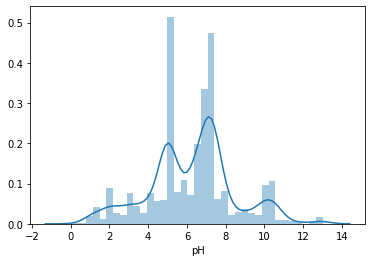

In [51]:
sns.distplot(logp_ph_data.pH)

In [52]:
logp_ph_data[~logp_ph_data['smiles'].duplicated(keep=False)].pH.std()

2.1517201308778215

In [53]:
grouped_data = logp_ph_data.groupby(['smiles', 'pH']).agg(logP_std=('logP', 'std'), 
                                       logP_count=('logP', 'count')).sort_values(by=['logP_count'], ascending=False)
grouped_data.head()

,,logP_std,logP_count
smiles,pH,,
CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1,2.0,0.140000,3
CCC(C)C(NC(=O)C(N)CC(C)C)C(=O)O,7.0,1.640488,2
CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1,5.0,0.028284,2
CSCCC(N)C(=O)NC(C(=O)O)C(C)C,7.0,1.590990,2
CC(C)CC(N)C(=O)NC(C(=O)O)C(C)C,7.0,1.633417,2


In [54]:
logp_ph_data[~logp_ph_data['smiles'].duplicated(keep=False)].logP.std()

2.2131015877973033

In [55]:
grouped_data = logp_ph_data.groupby(['smiles']).agg(logP_std=('logP', 'std'), 
                                       logP_count=('logP', 'count')).sort_values(by=['logP_std'], ascending=False)
grouped_data.head(20)

,logP_std,logP_count
smiles,,
O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O,2.255671,2
CN1C(C(=O)N=c2cccc[nH]2)C(=O)c2ccccc2S1(=O)=O,1.983435,2
CC(C)C(N)C(=O)NC(C(=O)O)C(C)C,1.767767,2
CC(C)CCn1c(=NCCO)[nH]c2c1c(=O)n(C)c(=O)n2C,1.718269,2
CCC(C)C(NC(=O)C(N)CC(C)C)C(=O)O,1.640488,2
CC(C)CC(N)C(=O)NC(C(=O)O)C(C)C,1.633417,2
CSCCC(N)C(=O)NC(C(=O)O)C(C)C,1.590990,2
CC(C)CC(NC(=O)C(N)Cc1ccc(O)cc1)C(=O)O,1.463711,2
COc1nc(=NC(=O)NS(=O)(=O)c2ccccc2OCCCl)nc(C)[nH]1,1.414105,4


In [56]:
bad_smiles = ['O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O', 
'CN1C(C(=O)N=c2cccc[nH]2)C(=O)c2ccccc2S1(=O)=O',
'CC(C)C(N)C(=O)NC(C(=O)O)C(C)C',
'CC(C)CCn1c(=NCCO)[nH]c2c1c(=O)n(C)c(=O)n2C',
'CCC(C)C(NC(=O)C(N)CC(C)C)C(=O)O',
'CC(C)CC(N)C(=O)NC(C(=O)O)C(C)C',
'CSCCC(N)C(=O)NC(C(=O)O)C(C)C',
'CC(C)CC(NC(=O)C(N)Cc1ccc(O)cc1)C(=O)O',
'COc1nc(=NC(=O)NS(=O)(=O)c2ccccc2OCCCl)nc(C)[nH]1']

In [57]:
logp_ph_verified_data = logp_ph_data[~logp_ph_data.smiles.isin(bad_smiles)]

In [58]:
grouped_data = logp_ph_verified_data.groupby(['smiles']).agg(logP_std=('logP', 'std'), 
                                       logP_count=('logP', 'count')).sort_values(by=['logP_std'], ascending=False)
grouped_data.head(20)

,logP_std,logP_count
smiles,,
O=c1[nH]c2c(O)ccc(CCNCCCSCCOCCc3ccccc3)c2s1,0.862670,2
CCN(CC)C(=O)C(C#N)=Cc1cc(OC(=O)NC(C)(C)C)c(O)c([N+](=O)[O-])c1,0.749533,2
CCCCNC(=O)Oc1cc(C=C(C#N)C(=O)N(CC)CC)cc([N+](=O)[O-])c1O,0.721249,2
O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,0.251226,14
O=c1[nH]c2c(O)ccc(CCNCCCS(=O)(=O)CCCOCCc3ccccc3)c2s1,0.219203,2
CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,0.193680,33
CCCCCCCCCCCC(=O)O,0.178885,5
CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccc(OC)cc2)NC(=O)N2CCOCC2)OC1=O,0.141421,2
CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccc(OC)cc2)NC(=O)C(C)C)OC1=O,0.127279,2


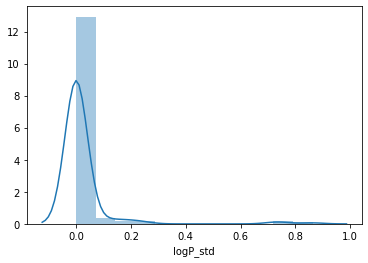

In [59]:
sns.distplot(grouped_data.logP_std)

In [60]:
logp_drop_ph_verified_data = logp_ph_verified_data.drop(columns=['pH'])
logp_drop_ph_verified_data = logp_drop_ph_verified_data.groupby(['smiles']).mean().reset_index()
logp_drop_ph_verified_data.head()

,smiles,logP
0,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,4.53
1,C#CCN1C(=O)C2CC[C@@](C)(C1=O)C2(C)C,2.28
2,C#CCOc1c(I)cc(C=C2C(=O)N(C)C(=S)N(C)C2=O)cc1OCC,3.72
3,C#CCOc1ccc(C2C3=C(CC(C)(C)CC3=O)OC3=C2C(=O)CC(...,4.93
4,C#Cc1cccc(NC(=O)c2cc(C(=O)Nc3cccc(C#C)c3)cc(N3...,6.85


In [61]:
logp_all_dataset = pd.concat([logp_drop_ph_verified_data, logp_data])

In [62]:
logp_all_dataset = logp_all_dataset.drop_duplicates()
logp_all_dataset

,smiles,logP
0,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,4.53
1,C#CCN1C(=O)C2CC[C@@](C)(C1=O)C2(C)C,2.28
2,C#CCOc1c(I)cc(C=C2C(=O)N(C)C(=S)N(C)C2=O)cc1OCC,3.72
3,C#CCOc1ccc(C2C3=C(CC(C)(C)CC3=O)OC3=C2C(=O)CC(...,4.93
4,C#Cc1cccc(NC(=O)c2cc(C(=O)Nc3cccc(C#C)c3)cc(N3...,6.85
...,...,...
14106,ClCC1(C(Cl)Cl)C2CC(Cl)(Cl)C1(C(Cl)Cl)C(Cl)C2Cl,5.77
14107,ClCC1(C(Cl)Cl)C2C(Cl)C(Cl)C1(C(Cl)Cl)C(Cl)C2Cl,5.93
14108,ClCC1(C(Cl)Cl)C2CC(Cl)(Cl)C1(C(Cl)Cl)C(Cl)C2(C...,6.64
14109,CC1=CCC2C(C1=O)C2(C)C,2.42


In [63]:
logp_all_dataset.describe()

,logP
count,14171.000000
mean,2.127182
std,1.874656
min,-4.650000
25%,0.890000
50%,2.030000
75%,3.260000
max,9.960000


In [64]:
logp_all_dataset.groupby(['smiles']).agg(logP_std=('logP', 'std'), 
                                       logP_count=('logP', 'count')).sort_values(by=['logP_std'], ascending=False)
grouped_data.head(20)

,logP_std,logP_count
smiles,,
O=c1[nH]c2c(O)ccc(CCNCCCSCCOCCc3ccccc3)c2s1,0.862670,2
CCN(CC)C(=O)C(C#N)=Cc1cc(OC(=O)NC(C)(C)C)c(O)c([N+](=O)[O-])c1,0.749533,2
CCCCNC(=O)Oc1cc(C=C(C#N)C(=O)N(CC)CC)cc([N+](=O)[O-])c1O,0.721249,2
O=C(CCCN1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,0.251226,14
O=c1[nH]c2c(O)ccc(CCNCCCS(=O)(=O)CCCOCCc3ccccc3)c2s1,0.219203,2
CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,0.193680,33
CCCCCCCCCCCC(=O)O,0.178885,5
CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccc(OC)cc2)NC(=O)N2CCOCC2)OC1=O,0.141421,2
CCN1CC(C(O)C(CC2CCCCC2)NC(=O)C(Cc2c[nH]cn2)NC(=O)C(Cc2ccc(OC)cc2)NC(=O)C(C)C)OC1=O,0.127279,2


In [65]:
logp_all_unique_dataset = logp_all_dataset.groupby(['smiles']).mean().reset_index()
logp_all_unique_dataset.shape

(13777, 2)

In [66]:
logp_ph_verified_data = logp_ph_verified_data.groupby(['smiles', 'pH']).mean().reset_index()
logp_ph_verified_data.head()

,smiles,pH,logP
0,C#CC1(O)CCC2C3CCC4=Cc5oncc5CC4(C)C3CCC21C,7.5,4.53
1,C#CCN1C(=O)C2CC[C@@](C)(C1=O)C2(C)C,5.0,2.28
2,C#CCOc1c(I)cc(C=C2C(=O)N(C)C(=S)N(C)C2=O)cc1OCC,5.0,3.72
3,C#CCOc1ccc(C2C3=C(CC(C)(C)CC3=O)OC3=C2C(=O)CC(...,5.0,4.93
4,C#Cc1cccc(NC(=O)c2cc(C(=O)Nc3cccc(C#C)c3)cc(N3...,5.0,6.85


In [67]:
logp_ph_verified_data.to_csv("../data/3_final_data/logp_pH_mean.csv")

In [77]:
grouped_logp_data = logp_data.groupby(['smiles']).agg(count_of_records=('logP', 'count'), 
                                       std=('logP', 'std')).sort_values(by=['count_of_records'], ascending=False)
grouped_logp_data.head()

,count_of_records,std
smiles,,
ClC1=CC(Cl)C(Cl)C(Cl)C1Cl,5,0.153199
ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl,4,0.189737
CN(N=O)C(=O)NC1C(O)OC(CO)C(O)C1O,4,0.283122
CC(C)NCC(O)COc1ccc(CC(N)=O)cc1,4,0.158640
CC(C(=O)O)c1cccc(C(=O)c2ccccc2)c1,4,0.192592


In [85]:
logp_data.describe()

,logP
count,14111.000000
mean,2.127711
std,1.876122
min,-4.650000
25%,0.890000
50%,2.030000
75%,3.260000
max,9.960000


In [91]:
grouped_logp_data = logp_data.groupby(['smiles']).agg(count_of_records=('logP', 'count'), 
                                       std=('logP', 'std')).sort_values(by=['std'], ascending=False)
grouped_logp_data.head(20)

,count_of_records,std
smiles,,
CCC1(c2ccccc2)C(=O)NC(=O)N1S(=O)(=O)c1ccccc1,2,3.450681
COC(=O)c1ccccc1S(=O)(=O)NC(=O)N=c1nc(C)[nH]c(OC)n1,2,2.786001
O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O,2,2.255671
O=C(O)c1ccc[nH]c1=Nc1cccc(C(F)(F)F)c1,2,2.008183
CN1C(C(=O)N=c2cccc[nH]2)C(=O)c2ccccc2S1(=O)=O,2,1.983435
CC(Oc1ccc(Cl)cc1Cl)C(=O)O,3,1.842932
CC1(C)SC2C(NC(=O)C(N)c3ccc(O)cc3)C(=O)N2C1C(=O)O,2,1.824335
CC(C)C(N)C(=O)NC(C(=O)O)C(C)C,2,1.767767
CC(C)CCn1c(=NCCO)[nH]c2c1c(=O)n(C)c(=O)n2C,2,1.718269


In [92]:
bad_smiles = ['CCC1(c2ccccc2)C(=O)NC(=O)N1S(=O)(=O)c1ccccc1',
'COC(=O)c1ccccc1S(=O)(=O)NC(=O)N=c1nc(C)[nH]c(OC)n1',
'O=C(Nc1ccc([N+](=O)[O-])cc1Cl)c1cc(Cl)ccc1O',
'O=C(O)c1ccc[nH]c1=Nc1cccc(C(F)(F)F)c1',
'CN1C(C(=O)N=c2cccc[nH]2)C(=O)c2ccccc2S1(=O)=O',
'CC(Oc1ccc(Cl)cc1Cl)C(=O)O',
'CC1(C)SC2C(NC(=O)C(N)c3ccc(O)cc3)C(=O)N2C1C(=O)O',
'CC(C)C(N)C(=O)NC(C(=O)O)C(C)C',
'CC(C)CCn1c(=NCCO)[nH]c2c1c(=O)n(C)c(=O)n2C',
'CCC(C)C(NC(=O)C(N)CC(C)C)C(=O)O',
'CC(C)CC(N)C(=O)NC(C(=O)O)C(C)C',
'CSCCC(N)C(=O)NC(C(=O)O)C(C)C',
'CCOC(=O)c1ccccc1S(=O)(=O)NC(=O)N=c1nc(Cl)cc(OC)[nH]1',
'CC(C)CC(NC(=O)C(N)Cc1ccc(O)cc1)C(=O)O',
'COc1nc(=NC(=O)NS(=O)(=O)c2ccccc2OCCCl)nc(C)[nH]1',
'Cc1cnc2c(C(=O)O)c(Cl)ccc2c1',
'CC(CCc1ccccc1)NCC(O)c1ccc(O)c(C(N)=O)c1',
'CC#CC#CC#CC=CC(=O)OC']

In [99]:
logp_verified_data = logp_data[~logp_data.smiles.isin(bad_smiles)]
logp_verified_data.shape

(14073, 2)

In [100]:
logp_verified_data = logp_verified_data.groupby(['smiles']).mean().reset_index()
logp_verified_data.head()

,smiles,logP
0,BrC(Br)(Br)Br,3.42
1,BrC1C2CC3C(C2)C13,3.11
2,BrC1CC2CCC1C2,3.54
3,BrC1CCCCC1,3.20
4,BrC=C(Br)Br,3.20


In [101]:
logp_verified_data.shape

(13759, 2)

In [102]:
logp_verified_data.to_csv("../data/3_final_data/logp_mean.csv")